## **Trying to understand scaling of relative Nino3.4 index**

In [27]:
nino34 = read.csv("nino34.csv")
nino34rel = read.csv("nino34rel.csv")
sst = read.csv("sst-anom.csv")

m_adj = c(1.2571,1.2948,1.3355,1.3746,1.3167,1.2179,1.1565,1.1505,1.1678,1.1909,1.2127,1.2350) # scaling factors taken from Climate Explorer
m_mean = sapply(1:12, function(m) { mean(sst[(as.integer(substr(sst$time,6,7)) == m) & (substr(sst$time,1,4) >= 1980) & (substr(sst$time,1,4) <= 2010),"X0"]) }) # adjustments to monthly mean

nino34_det = data.frame(time = nino34$time, X0 = nino34$X0 - sst$X0)

In [59]:
get_m <- function(df, m) { df[(as.integer(substr(df$time,6,7)) == m),] }

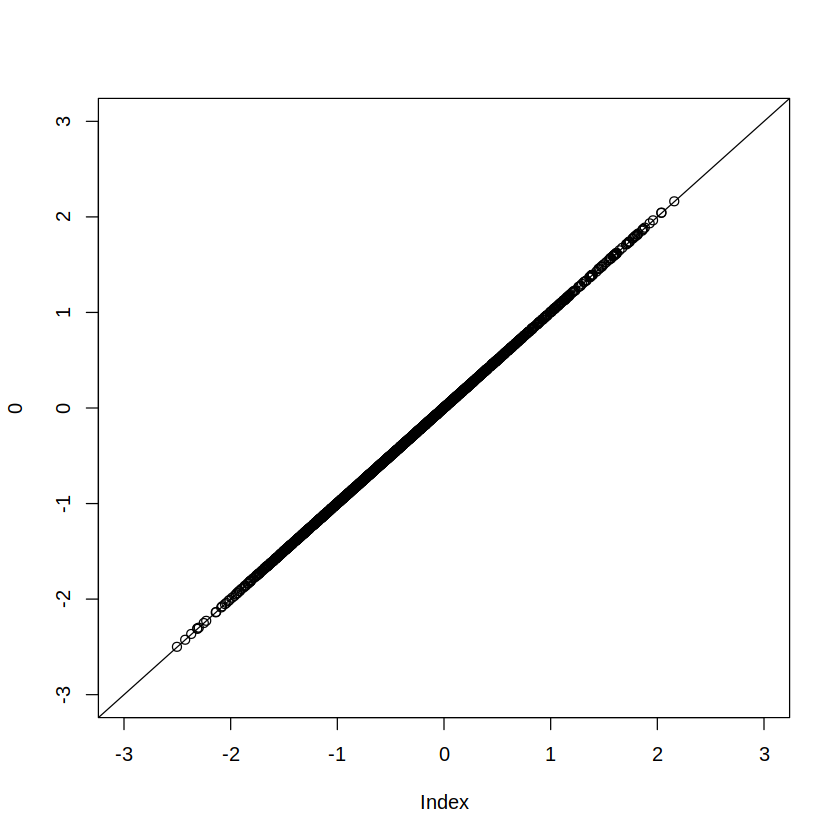

In [42]:
# confirm that this is the correct way to normalise
plot(0, type = "n", xlim = c(-3,3), ylim = c(-3,3))
abline(0,1)
for(m in 1:12) { points(get_m(nino34_det, m)$X0, get_m(nino34rel, m)$X0 / m_adj[m] - m_mean[m]) }

**So where does the scaling adjustment come from?**

A technical point is that this index will have a 20% smaller variability than the original Niño3.4 index, as a large part of the interannual variability of the 20∘ S–20∘ N series is also ENSO-driven. This is not acceptable for users who rely on fixed categorical thresholds to define events, such as the NOAA thresholds of ±0.5$^\circ$C. In addition, statistical models that use the Niño3.4 index would need refitting. We therefore propose to renormalize the series to the same variability as the original Niño3.4 series by multiplying by 1/(1 − A) with A the regression of the 20$^\circ$S–20$^\circ$N SST anomalies on the Niño3.4 index after taking year-on-year differences to isolate the ENSO signal. The regression has a strong seasonal cycle, so it is determined for each month separately (averaging over the two adjoining months in the fit to increase the signal/noise ratio).

In [35]:
A <- 1-(1/m_mean)